In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('datasets/dataset_Facebook.csv',sep=';')

In [60]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


*Page total likes* может выступать в своем роде идентификатором fb страницы/аккаунта, но это неточно.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

Есть пропущенные значения. По одному в *paid*, *like* и четыре в *share*

Покажем их:

In [62]:
df[df.isnull().any(axis=1)]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,NaN,2
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,NaN,7
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,NaN,18
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


Пропуски можно заполнить медианными (для соответствующего аттрибута) значениями (можно еще было бы их вообще выкинуть, т.к. их доля мала. Или заполнить нулями. В пользу последнего варианта в случае share говорит отсутствие комментариев и небольшое (где известно) количество лайков

In [63]:
df_n=df.fillna(df.median())

In [67]:
df_n.loc[df.isnull().any(axis=1)]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,101.0,19.0,0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,19.0,2
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,19.0,7
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,19.0,18
499,81370,Photo,2,1,4,4,0.0,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


После данного шага необходимо пересчитать *Total Interactions* - сейчас для вычисления NaN принимался за 0.

In [94]:
df_n['Total Interactions']=df_n.like+df_n.share+df_n.comment

In [95]:
df_n[df.isnull().any(axis=1)]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,101.0,19.0,120.0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,19.0,21.0
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,19.0,26.0
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,19.0,37.0
499,81370,Photo,2,1,4,4,0.0,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119.0


In [96]:
df_n.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.792000,27.200000,212.474000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.092858,42.448554,380.078545
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.750000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Из указанных выше некоторые аттрибуты являются категориальными: *category*, *month*, *weekday*, *post hour* u *paid*. Их лучше оценивать по другому:

In [97]:
num_feats=['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']

In [98]:
cat_feats=['Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid',]

In [99]:
df[cat_feats].astype('category').describe()

,Type,Category,Post Month,Post Weekday,Post Hour,Paid
count,500,500,500,500,500,499.0
unique,4,3,12,7,22,2.0
top,Photo,1,10,7,3,0.0
freq,426,215,60,82,105,360.0


Моды, кстати, вот - строка *top*. Для численных признаков найдем позже.

In [100]:
df_n.Category.value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

In [101]:
df_n['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

In [102]:
df_n['Post Weekday'].value_counts()

7    82
6    81
4    72
1    68
5    67
2    66
3    64
Name: Post Weekday, dtype: int64

In [103]:
df_n['Post Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Post Hour, dtype: int64

In [104]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

Нагляднее будет использовать визуализацию:

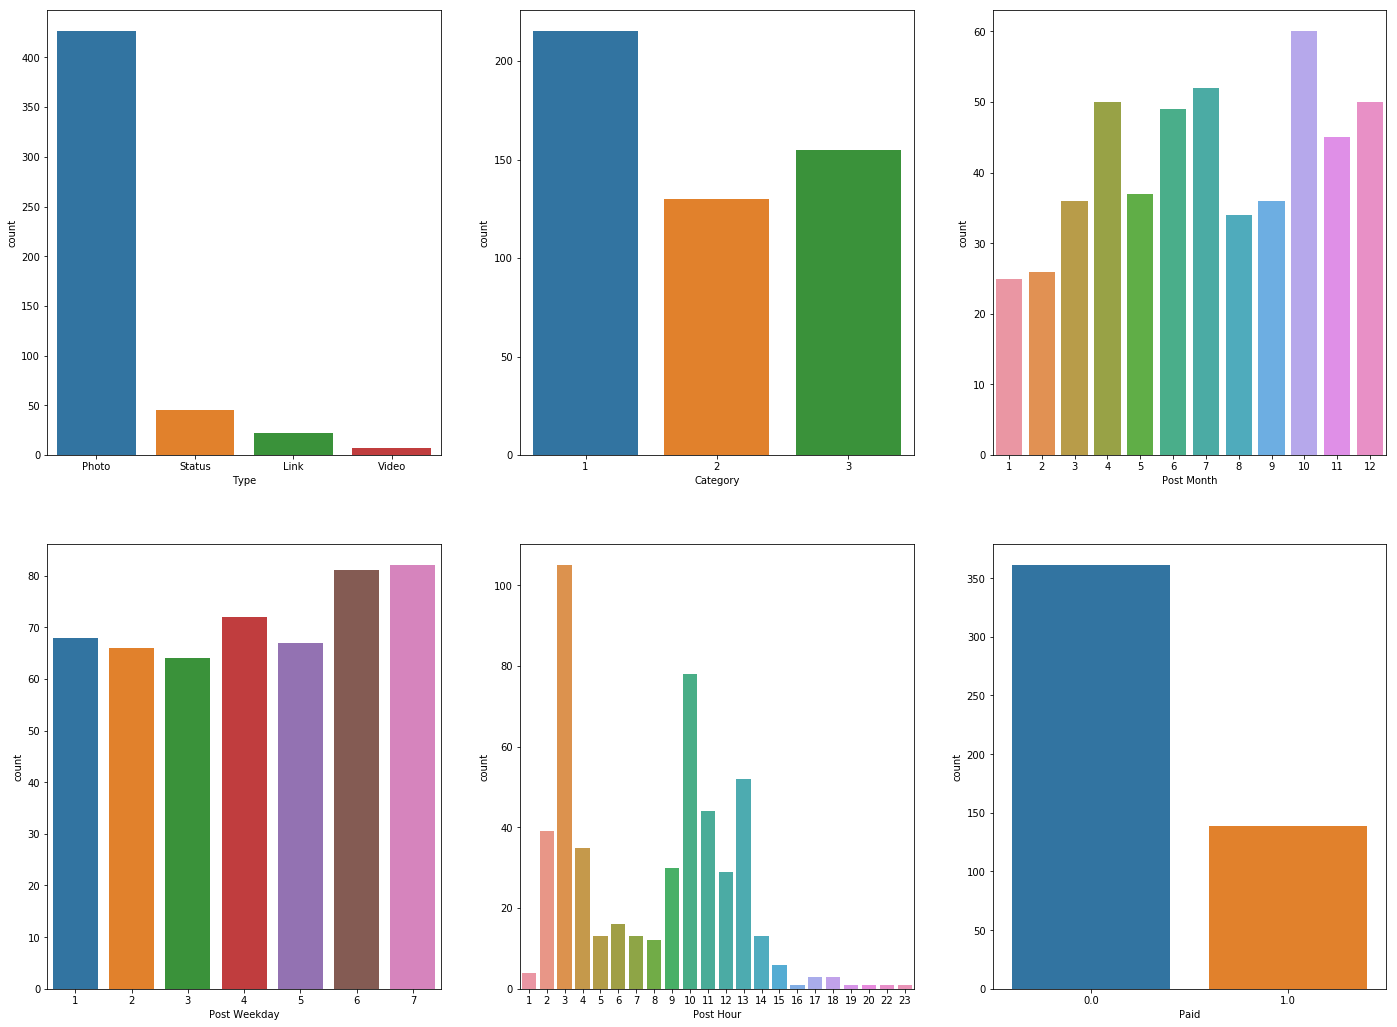

In [105]:
fig, axes = plt.subplots(ncols=3, nrows = 2, figsize=(24, 18))
for i in range(len(cat_feats)):
    sns.countplot(df_n[cat_feats[i]],ax=axes[i//3, i%3])

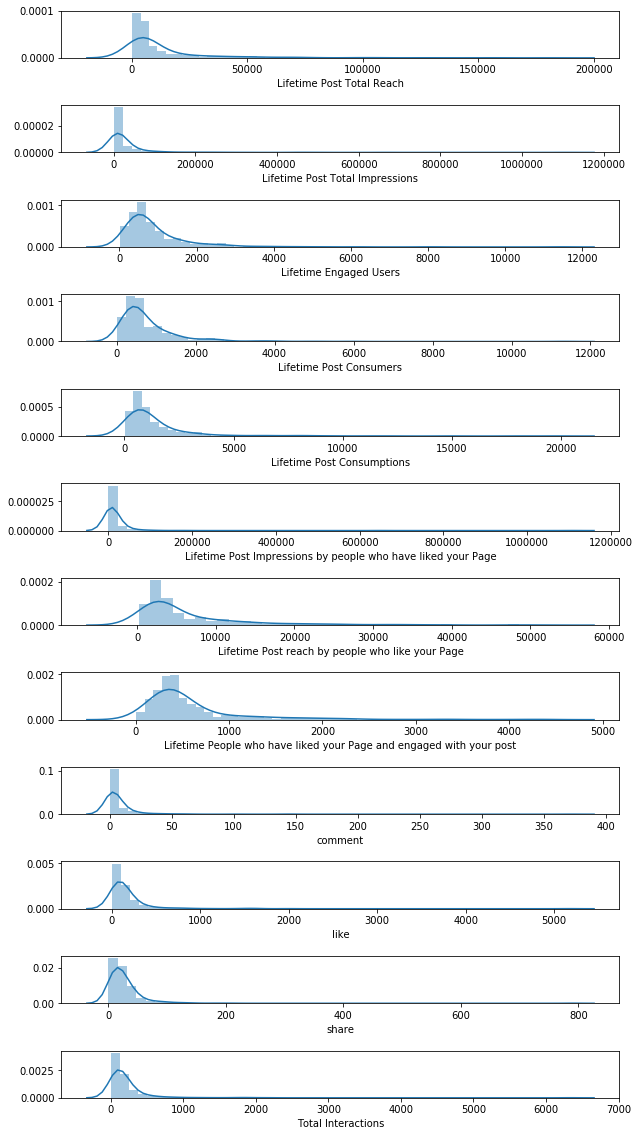

In [106]:
plt.figure(figsize=(10,20))   
for i,v in enumerate(range(len(num_feats))):
    v = v+1
    ax1 = plt.subplot(len(num_feats),1,v)
    ax1=sns.distplot(df_n[num_feats[i]])
plt.subplots_adjust(bottom=None, top=None, wspace=None, hspace=1)

Можно еще и боксплоты нарисовать позже.

Вернемся к модам численных признаков:

In [107]:
df_n[num_feats].mode()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,677.0,4372.0,537.0,182.0,431.0,1210.0,690,403.0,0.0,98.0,13.0,39.0
1,2232.0,6503.0,NaN,298.0,513.0,1284.0,704,NaN,NaN,NaN,14.0,75.0
2,2645.0,7004.0,NaN,319.0,599.0,2541.0,1228,NaN,NaN,NaN,NaN,NaN
3,2938.0,8533.0,NaN,322.0,652.0,2888.0,1640,NaN,NaN,NaN,NaN,NaN
4,3322.0,8745.0,NaN,335.0,719.0,3675.0,1674,NaN,NaN,NaN,NaN,NaN
5,3358.0,12735.0,NaN,374.0,730.0,4911.0,1722,NaN,NaN,NaN,NaN,NaN
6,3414.0,NaN,NaN,482.0,795.0,4935.0,2044,NaN,NaN,NaN,NaN,NaN
7,3528.0,NaN,NaN,503.0,889.0,5010.0,2124,NaN,NaN,NaN,NaN,NaN
8,3754.0,NaN,NaN,513.0,NaN,5732.0,2162,NaN,NaN,NaN,NaN,NaN
9,5280.0,NaN,NaN,642.0,NaN,NaN,2174,NaN,NaN,NaN,NaN,NaN


Как мы видим, для некоторых аттрибутом может быть несколько мод - у *Lifetime Post reach by people who like your Page* целых 30 (по 2 вхождения)
(тут пока не искал более аккуратного представления, можно конечно их все закинуть в .describe под видом категорий, как я сделал выше с действительно категориальными признаками).

Теперь можно посмотреть для каждого типа контента в отдельности

In [108]:
pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
pd.set_option('display.max_columns', 100)

In [109]:
print(df_n[num_feats+['Type']].groupby('Type').describe())

       Lifetime Engaged Users                                           \
                        count         mean          std    min     25%   
Type                                                                     
Link                     22.0   342.818182   340.174414   24.0   105.0   
Photo                   426.0   818.946009   868.447092    9.0   399.0   
Status                   45.0  2040.222222  1351.996838  128.0  1151.0   
Video                     7.0  1707.000000  1174.786080  459.0   829.0   

                                 \
           50%     75%      max   
Type                              
Link     244.0   422.0   1374.0   
Photo    605.5   949.0  11452.0   
Status  1701.0  2675.0   6164.0   
Video   1779.0  2090.5   3872.0   

       Lifetime People who have liked your Page and engaged with your post  \
                                                                     count   
Type                                                                         
L

In [110]:
print(df_n[cat_feats].astype('category').groupby('Type').describe())

       Category                   Paid                    Post Hour         \
          count unique top freq  count unique  top   freq     count unique   
Type                                                                         
Link         22      3   1   20   22.0    2.0  0.0   16.0        22      9   
Photo       426      3   1  185  426.0    2.0  0.0  307.0       426     22   
Status       45      3   2   38   45.0    2.0  0.0   35.0        45     12   
Video         7      1   1    7    7.0    2.0  1.0    4.0         7      5   

                Post Month                 Post Weekday                  
       top freq      count unique top freq        count unique top freq  
Type                                                                     
Link     3    6         22      8  12    6           22      7   6    5  
Photo    3   89        426     12  10   49          426      7   7   71  
Status  10   10         45     10  12   12           45      7   7    9  
Video   1

Популярность поста я решил оценить через вовлеченность по охвату.



In [111]:
df_n['ERR']=(df_n['Total Interactions'])/df_n['Lifetime Post Total Reach']

In [112]:
df_n['ERR']=(df_n['Total Interactions'])/df_n['Lifetime Post Total Reach']

In [113]:
df_n.loc[df_n.ERR==df_n.ERR.max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,ERR
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,101.0,19.0,120.0,0.095163


Хотя также можно использовать просто наибольшее число взаимодействий.

In [114]:
df_n.loc[df_n['Total Interactions']==df_n['Total Interactions'].max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,ERR
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334.0,0.035095
